In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import normalize
import seaborn as sns


df=pd.read_csv("/content/drive/MyDrive/Epileptic Seizure Recognition.csv")
df

Unnamed   X1   X2   X3   X4   X5   X6   X7   X8   X9  ...  X170  \
0      X21.V1.791  135  190  229  223  192  125   55   -9  -33  ...   -17   
1      X15.V1.924  386  382  356  331  320  315  307  272  244  ...   164   
2         X8.V1.1  -32  -39  -47  -37  -32  -36  -57  -73  -85  ...    57   
3       X16.V1.60 -105 -101  -96  -92  -89  -95 -102 -100  -87  ...   -82   
4       X20.V1.54   -9  -65  -98 -102  -78  -48  -16    0  -21  ...     4   
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
11495  X22.V1.114  -22  -22  -23  -26  -36  -42  -45  -42  -45  ...    15   
11496  X19.V1.354  -47  -11   28   77  141  211  246  240  193  ...   -65   
11497    X8.V1.28   14    6  -13  -16   10   26   27   -9    4  ...   -65   
11498  X10.V1.932  -40  -25   -9  -12   -2   12    7   19   22  ...   121   
11499  X16.V1.210   29   41   57   72   74   62   54   43   31  ...   -59   

       X171  X172  X173  X174  X175  X176  X177  X178  y  
0       -15   -31   -77  -103  -127  -116   -83   -51  4  
1       150   146   152   157   156   154   143   129  1  
2        64    48    19   -12   -30   -35   -35   -36  5  
3       -81   -80   -77   -85   -77   -72   -69   -65  5  
4         2   -12   -32   -41   -65   -83   -89   -73  5  
...     ...   ...   ...   ...   ...   ...   ...   ... ..  
11495    16    12     5    -1   -18   -37   -47   -48  2  
11496   -33    -7    14    27    48    77   117   170  1  
11497   -48   -61   -62   -67   -30    -2    -1    -8  5  
11498   135   148   143   116    86    68    59    55  3  
11499   -25    -4     2     5     4    -2     2    20  4  

[11500 rows x 180 columns]

In [ ]:
!pip install sklearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=4e0aee0e6ac9182b926d237da0d538d5af6000bde01bad05adf9d96634310130
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built sklearn


In [ ]:
import sklearn

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
print(f"total instances and attributes: {df.shape}")

total instances and attributes: (11500, 180)


In [ ]:
df['y'].value_counts()

4    2300
1    2300
5    2300
2    2300
3    2300
Name: y, dtype: int64

In [ ]:
df.isna().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

In [ ]:
del df['Unnamed']

In [ ]:
co_matrix = df.corr()
co_matrix.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


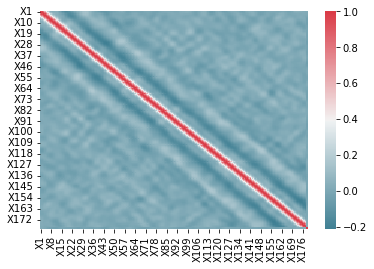

In [ ]:
co_matrix = df.corr()
import seaborn as sns
sns.heatmap(co_matrix, cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [ ]:
df_new=df.copy()

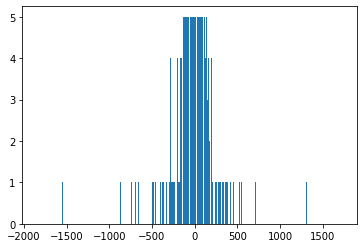

In [ ]:
plt.bar(df_new.X1,df_new.y)
plt.show()

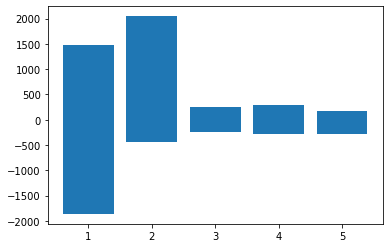

In [ ]:
plt.bar(df_new.y,df_new.X99)
plt.show()

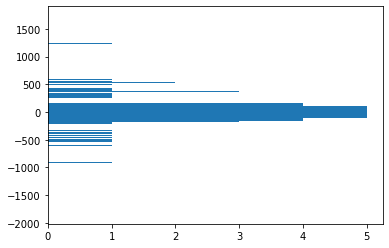

In [ ]:
plt.barh(df_new.X1,df_new.y)
plt.show()

In [ ]:
df['y'] = df['y'].apply(lambda x: 1 if x == 1 else 0)
df

X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...  X170  X171  \
0      135  190  229  223  192  125   55   -9  -33  -38  ...   -17   -15   
1      386  382  356  331  320  315  307  272  244  232  ...   164   150   
2      -32  -39  -47  -37  -32  -36  -57  -73  -85  -94  ...    57    64   
3     -105 -101  -96  -92  -89  -95 -102 -100  -87  -79  ...   -82   -81   
4       -9  -65  -98 -102  -78  -48  -16    0  -21  -59  ...     4     2   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
11495  -22  -22  -23  -26  -36  -42  -45  -42  -45  -49  ...    15    16   
11496  -47  -11   28   77  141  211  246  240  193  136  ...   -65   -33   
11497   14    6  -13  -16   10   26   27   -9    4   14  ...   -65   -48   
11498  -40  -25   -9  -12   -2   12    7   19   22   29  ...   121   135   
11499   29   41   57   72   74   62   54   43   31   23  ...   -59   -25   

       X172  X173  X174  X175  X176  X177  X178  y  
0       -31   -77  -103  -127  -116   -83   -51  0  
1       146   152   157   156   154   143   129  1  
2        48    19   -12   -30   -35   -35   -36  0  
3       -80   -77   -85   -77   -72   -69   -65  0  
4       -12   -32   -41   -65   -83   -89   -73  0  
...     ...   ...   ...   ...   ...   ...   ... ..  
11495    12     5    -1   -18   -37   -47   -48  0  
11496    -7    14    27    48    77   117   170  1  
11497   -61   -62   -67   -30    -2    -1    -8  0  
11498   148   143   116    86    68    59    55  0  
11499    -4     2     5     4    -2     2    20  0  

[11500 rows x 179 columns]

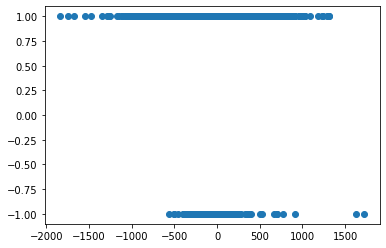

In [ ]:
plt.scatter(df.X1,df.y)
plt.show()

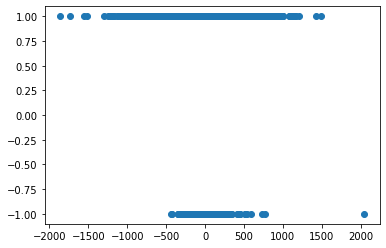

In [ ]:
plt.scatter(df.X99,df.y)
plt.show()

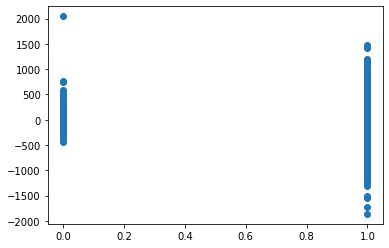

In [ ]:
plt.scatter(df.y,df.X99)
plt.show()

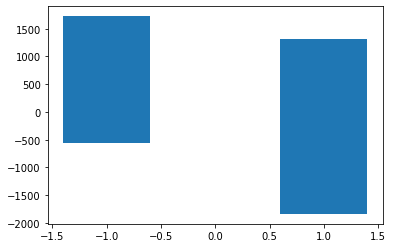

In [ ]:
plt.bar(df.y,df.X1)
plt.show()

### Baseline model

In [ ]:
sum(df['y']==0)/len(df['y'])

0.8

In [ ]:
df['y'].value_counts()/np.float(len(df))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


-1    0.8
 1    0.2
Name: y, dtype: float64

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 15.7 MB
None


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    9200
1    2300
Name: y, dtype: int64

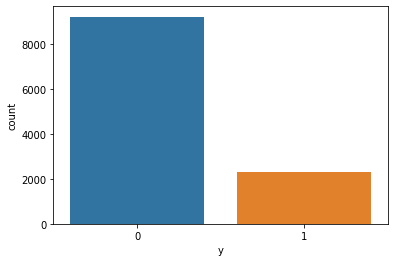

In [ ]:
# Show counterplot of 'y' feature
import seaborn as sns
sns.countplot(df.y)
df['y'].value_counts()

In [ ]:
# value 1 and 0 customers
print("No Seizure Detection = ", (df.y ==0).sum(), "out of 11500")
print("Seizure Detection = ",(df.y == 1).sum(),  "out of 11500")

No Seizure Detection =  9200 out of 11500
Seizure Detection =  2300 out of 11500


In [ ]:

# copy the data
df_min_max_scaled = df.copy()

# apply normalization techniques
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())

# view normalized data
df_min_max_scaled

X1        X2        X3        X4        X5        X6        X7  \
0      0.553717  0.571107  0.584371  0.598207  0.599275  0.526728  0.486466   
1      0.624123  0.625176  0.620328  0.629447  0.637957  0.579905  0.551431   
2      0.506872  0.506618  0.506229  0.522997  0.531581  0.481668  0.457592   
3      0.486396  0.489158  0.492356  0.507087  0.514355  0.465155  0.445991   
4      0.513324  0.499296  0.491789  0.504194  0.517679  0.478310  0.468162   
...         ...       ...       ...       ...       ...       ...       ...   
11495  0.509677  0.511405  0.513024  0.526179  0.530372  0.479989  0.460686   
11496  0.502665  0.514503  0.527463  0.555973  0.583862  0.550798  0.535705   
11497  0.519776  0.519290  0.515855  0.529071  0.544273  0.499020  0.479247   
11498  0.504628  0.510560  0.516988  0.530229  0.540647  0.495102  0.474091   
11499  0.523983  0.529147  0.535674  0.554527  0.563614  0.509096  0.486208   

             X8        X9       X10  ...      X170      X171      X172  \
0      0.462484  0.464883  0.467297  ...  0.507684  0.554390  0.544073   
1      0.535948  0.536146  0.536280  ...  0.557355  0.603836  0.603850   
2      0.445752  0.451505  0.452989  ...  0.527991  0.578064  0.570753   
3      0.438693  0.450990  0.456822  ...  0.489846  0.534612  0.527524   
4      0.464837  0.467970  0.461932  ...  0.513447  0.559485  0.550490   
...         ...       ...       ...  ...       ...       ...       ...   
11495  0.453856  0.461796  0.464486  ...  0.516465  0.563680  0.558595   
11496  0.527582  0.523025  0.511753  ...  0.494512  0.548996  0.552178   
11497  0.462484  0.474402  0.480583  ...  0.494512  0.544501  0.533941   
11498  0.469804  0.479033  0.484415  ...  0.545554  0.599341  0.604525   
11499  0.476078  0.481348  0.482882  ...  0.496158  0.551393  0.553191   

           X173      X174      X175      X176      X177      X178    y  
0      0.521051  0.489858  0.454331  0.434953  0.435612  0.474893  0.0  
1      0.593542  0.562101  0.528396  0.505486  0.495495  0.522970  1.0  
2      0.551440  0.515143  0.479717  0.456113  0.448331  0.478900  0.0  
3      0.521051  0.494860  0.467417  0.446447  0.439322  0.471154  0.0  
4      0.535296  0.507085  0.470557  0.443574  0.434022  0.469017  0.0  
...         ...       ...       ...       ...       ...       ...  ...  
11495  0.547009  0.518199  0.482858  0.455590  0.445151  0.475694  0.0  
11496  0.549858  0.525979  0.500131  0.485371  0.488606  0.533921  1.0  
11497  0.525799  0.499861  0.479717  0.464734  0.457340  0.486378  0.0  
11498  0.590693  0.550709  0.510076  0.483020  0.473238  0.503205  0.0  
11499  0.546059  0.519867  0.488616  0.464734  0.458135  0.493857  0.0  

[11500 rows x 179 columns]

In [ ]:
df_min_max_scaled.describe()

X1            X2            X3            X4            X5  \
count  11500.000000  11500.000000  11500.000000  11500.000000  11500.000000   
mean       0.512600      0.514528      0.516651      0.531055      0.538831   
std        0.046459      0.046764      0.046298      0.046650      0.048655   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.500701      0.502112      0.504247      0.518079      0.524932   
50%        0.513604      0.515348      0.517554      0.531386      0.538833   
75%        0.525386      0.527457      0.529728      0.544113      0.551828   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 X6            X7            X8            X9           X10  \
count  11500.000000  11500.000000  11500.000000  11500.000000  11500.000000   
mean       0.489784      0.470610      0.463088      0.471686      0.475430   
std        0.045152      0.041626      0.042384      0.041686      0.040990   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.476630      0.458366      0.450458      0.459223      0.463209   
50%        0.489505      0.470224      0.462745      0.471572      0.475217   
75%        0.501819      0.481310      0.474248      0.482634      0.486012   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       ...          X170          X171          X172          X173  \
count  ...  11500.000000  11500.000000  11500.000000  11500.000000   
mean   ...      0.509565      0.555400      0.550171      0.541099   
std    ...      0.045185      0.049790      0.056925      0.053358   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.497256      0.542104      0.535630      0.527699   
50%    ...      0.509879      0.555889      0.551165      0.542260   
75%    ...      0.521679      0.569074      0.565687      0.555872   
max    ...      1.000000      1.000000      1.000000      1.000000   

               X174          X175          X176          X177          X178  \
count  11500.000000  11500.000000  11500.000000  11500.000000  11500.000000   
mean       0.514764      0.484155      0.461937      0.454312      0.485258   
std        0.046473      0.042984      0.042554      0.043160      0.044031   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.503195      0.472913      0.450888      0.443031      0.473825   
50%        0.515699      0.485213      0.462905      0.455220      0.486111   
75%        0.527924      0.496467      0.474138      0.466614      0.497596   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                  y  
count  11500.000000  
mean       0.200000  
std        0.400017  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 179 columns]

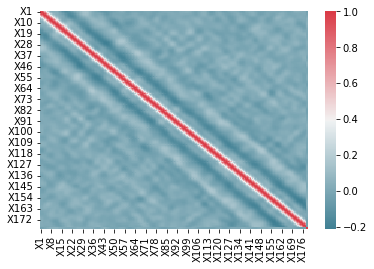

In [ ]:
co_matrix = df_min_max_scaled.corr()
import seaborn as sns
sns.heatmap(co_matrix, cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [ ]:
df_min_max_scaled = df.copy()
df_min_max_scaled[df_min_max_scaled>1]=0
X = df_min_max_scaled.loc[:, df_min_max_scaled.columns != 'y']
y = df_min_max_scaled.loc[:, df_min_max_scaled.columns == 'y']

for column in X.columns:
  X[column] = (X[column] - X[column].min()) / (X[column].max() - X[column].min())

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


## **SVM**

### *Soft Margin SVM*

In [ ]:
# df['y'] = df['y'].apply(lambda x: 1 if x == 1.0 else -1.0)
# df

X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...  X170  X171  \
0      135  190  229  223  192  125   55   -9  -33  -38  ...   -17   -15   
1      386  382  356  331  320  315  307  272  244  232  ...   164   150   
2      -32  -39  -47  -37  -32  -36  -57  -73  -85  -94  ...    57    64   
3     -105 -101  -96  -92  -89  -95 -102 -100  -87  -79  ...   -82   -81   
4       -9  -65  -98 -102  -78  -48  -16    0  -21  -59  ...     4     2   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
11495  -22  -22  -23  -26  -36  -42  -45  -42  -45  -49  ...    15    16   
11496  -47  -11   28   77  141  211  246  240  193  136  ...   -65   -33   
11497   14    6  -13  -16   10   26   27   -9    4   14  ...   -65   -48   
11498  -40  -25   -9  -12   -2   12    7   19   22   29  ...   121   135   
11499   29   41   57   72   74   62   54   43   31   23  ...   -59   -25   

       X172  X173  X174  X175  X176  X177  X178    y  
0       -31   -77  -103  -127  -116   -83   -51 -1.0  
1       146   152   157   156   154   143   129  1.0  
2        48    19   -12   -30   -35   -35   -36 -1.0  
3       -80   -77   -85   -77   -72   -69   -65 -1.0  
4       -12   -32   -41   -65   -83   -89   -73 -1.0  
...     ...   ...   ...   ...   ...   ...   ...  ...  
11495    12     5    -1   -18   -37   -47   -48 -1.0  
11496    -7    14    27    48    77   117   170  1.0  
11497   -61   -62   -67   -30    -2    -1    -8 -1.0  
11498   148   143   116    86    68    59    55 -1.0  
11499    -4     2     5     4    -2     2    20 -1.0  

[11500 rows x 179 columns]

#### **RBF Kernel**

In [ ]:
# import SVC classifier
from sklearn.svm import SVC

svc=SVC()


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)



# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9735


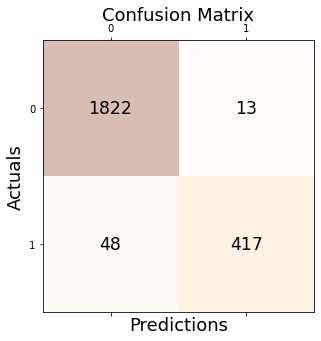

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))

Accuracy: 0.973
Recall: 0.897
Precision: 0.970


Model accuracy score with rbf kernel and C=100.0 : 0.9757
Accuracy: 0.976
Recall: 0.916
Precision: 0.962


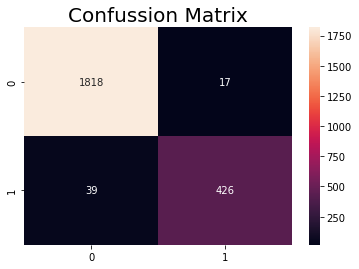

In [ ]:
svc=SVC(C=100.0)


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

sns.heatmap(conf_matrix, annot = True, fmt = 'g')
plt.title("Confussion Matrix", fontsize = 20)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))


Model accuracy score with rbf kernel and C=1000.0 : 0.9722
Accuracy: 0.972
Recall: 0.912
Precision: 0.949


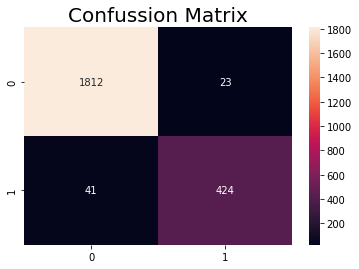

In [ ]:
svc=SVC(C=1000.0)


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = 'g')
plt.title("Confussion Matrix", fontsize = 20)

# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))

Model accuracy score with rbf kernel and C=5.0 : 0.9783
Accuracy: 0.978
Recall: 0.916
Precision: 0.975


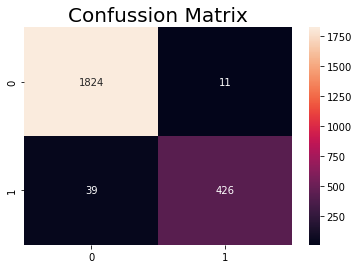

In [ ]:
svc=SVC(C=5)


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = 'g')
plt.title("Confussion Matrix", fontsize = 20)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=5.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))

### **Linear Kernel**

In [ ]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=5.0)


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=linear_svc.predict(X_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = 'g')
plt.title("Confussion Matrix", fontsize = 20)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=5.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))

NameError: ignored

### **Poly Kernel**

In [ ]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=5.0)


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = 'g')
plt.title("Confussion Matrix", fontsize = 20)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=5.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))

### **Sigmoid Kernel**

Model accuracy score with sigmoid kernel and C=5.0 : 0.7978
Accuracy: 0.798
Recall: 0.000
Precision: 0.000


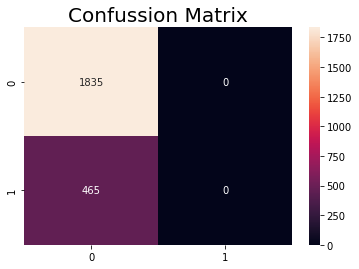

In [ ]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=5.0)


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = 'g')
plt.title("Confussion Matrix", fontsize = 20)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=5.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))

### *one VS one*

In [ ]:
# C values list
C = []
C.append(1)
for i in range(10):
    C.append(C[i]*2)
print(C)

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]


In [ ]:
X_1=df_new.drop(['y'], axis='columns')
y_1=df_new.y

In [ ]:
# copy the data

# apply normalization techniques
# for column in X_1.columns:
#     X_1[column] = (X_1[column] - X_1[column].min()) / (X_1[column].max() - X_1[column].min())

# # view normalized data
# X_1

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

Text(0, 0.5, 'Accuracy')

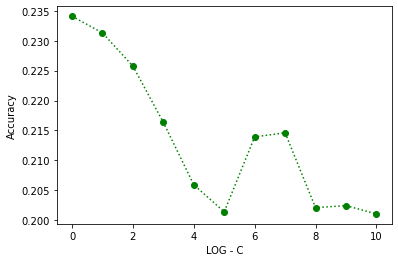

In [ ]:
from sklearn.multiclass import OneVsOneClassifier

# X=df_new.drop(['y'], axis='columns')
# y=df_new.y
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1,test_size=0.25, random_state=42)

# X_train_norm = normalize(X_train_1, norm='max', axis=1)
# X_test_norm = normalize(X_test_1, norm='max', axis=1)

X_train_norm = normalize(X_train, norm='max', axis=1)
X_test_norm = normalize(X_test, norm='max', axis=1)

# from sklearn.model_selection import train_test_split
#train_x, valid_x, train_y, valid_y = train_test_split(X_train_norm, y_train_1, test_size=0.25, random_state=1000)

c_accuracy = []
for c in C:
    ovo1 = OneVsOneClassifier((LinearSVC(random_state=0, C=c)).fit(X_train_norm, y_train), n_jobs=6)
    modelovo1 = ovo1.fit(X_train_norm, y_train)
    y_test_pred = modelovo1.predict(X_test_norm)
    accuracy = accuracy_score(y_test, y_test_pred)
    c_accuracy.append(accuracy)



log_C_params = []
for i in C:
    c = math.log(i, 2)
    log_C_params.append(c)
plt.plot(log_C_params, c_accuracy, marker='o',linestyle=':', color='green')
plt.xlabel('LOG - C')
plt.ylabel('Accuracy')

In [ ]:
print(f"the maximum accuracy is {round(max(c_accuracy),4)}")

the maximum accuracy is 0.2341


### *one VS rest*

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

Text(0, 0.5, 'Accuracy')

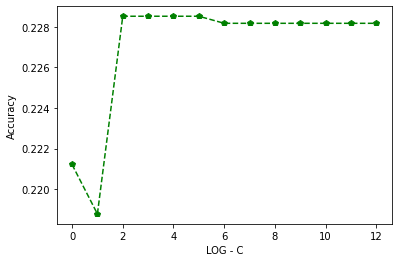

In [ ]:
# X=df_new.drop(['y'], axis='columns')
# y=df_new.y
# X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y,test_size=0.2, random_state=42)

# X_train_norm = normalize(X_train_1, norm='max', axis=1)
# X_test_norm = normalize(X_test_1, norm='max', axis=1)

# from sklearn.model_selection import train_test_split
# train_x, valid_x, train_y, valid_y = train_test_split(X_train_norm, y_train_1, test_size=0.25, random_state=1000)

c_accuracy = []
for c in C:
    ovo1 = OneVsRestClassifier((LinearSVC(random_state=0, C=c)).fit(X_train, y_train), n_jobs=4)
    modelovo1 = ovo1.fit(X_train, y_train)
    y_test_pred = modelovo1.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    c_accuracy.append(accuracy)

import math
log_C_params = []
for i in C:
    c = math.log(i, 2)
    log_C_params.append(c)
plt.plot(log_C_params, c_accuracy, marker='p',linestyle='--', color='green')
plt.xlabel('LOG - C')
plt.ylabel('Accuracy')

In [ ]:
print(f"the maximum accuracy is {round(max(c_accuracy),4)}")

the maximum accuracy is 0.2285


### We used SMOTE to create a balanced dataset because our dataset was imbalanced.

In [ ]:
# df_min_max_scaled = df.copy()
# df_min_max_scaled[df_min_max_scaled>1]=0
# X = df_min_max_scaled.loc[:, df_min_max_scaled.columns != 'y']
# y = df_min_max_scaled.loc[:, df_min_max_scaled.columns == 'y']
# Y[Y>1]=0
# Y

# for column in X.columns:
#   X[column] = (X[column] - X[column].min()) / (X[column].max() - X[column].min())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# X = df_min_max_scaled.loc[:, df_min_max_scaled.columns != 'y']
# y = df_min_max_scaled.loc[:, df_min_max_scaled.columns == 'y']

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

print("length of oversampled data is ",len(os_data_X))
print("Number of no Epileptic Seizure in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of Epileptic Seizure",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no Epileptic Seizure data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of Epileptic Seizure data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))


length of oversampled data is  14730
Number of no Epileptic Seizure in oversampled data 7365
Number of Epileptic Seizure 7365
Proportion of no Epileptic Seizure data in oversampled data is  0.5
Proportion of Epileptic Seizure data in oversampled data is  0.5


In [ ]:
os_data_X.shape

(14730, 178)

In [ ]:
os_data_y.value_counts()

y
0    7365
1    7365
dtype: int64

In [ ]:
os_data_y.shape

(14692, 1)

In [ ]:
os_data_X

X1        X2        X3        X4        X5        X6        X7  \
0      0.999457  0.999456  0.999455  0.999458  0.999442  0.999431  0.999454   
1      0.999457  0.999456  0.999455  0.999458  0.996652  0.993174  0.993999   
2      0.989674  0.992931  0.995098  0.995666  0.998326  0.999431  0.999454   
3      0.999457  0.999456  0.999455  0.999458  0.999442  0.999431  0.999454   
4      0.999457  0.992387  0.985839  0.991874  0.999442  0.999431  0.999454   
...         ...       ...       ...       ...       ...       ...       ...   
14687  0.957978  0.951821  0.935645  0.920354  0.909345  0.903025  0.906844   
14688  0.793865  0.737638  0.677182  0.607217  0.523651  0.442928  0.415047   
14689  0.937161  0.941203  0.947262  0.956231  0.962184  0.968864  0.979428   
14690  0.992083  0.990335  0.988707  0.988234  0.987329  0.987084  0.988285   
14691  0.998466  0.999456  0.973511  0.944929  0.945777  0.941531  0.918786   

             X8        X9       X10  ...      X169      X170      X171  \
0      0.999438  0.999457  0.999465  ...  0.999463  0.999465  0.999464   
1      0.999438  0.999457  0.999465  ...  0.976894  0.995182  0.999464   
2      0.999438  0.999457  0.999465  ...  0.999463  1.000000  0.991426   
3      0.999438  0.999457  0.999465  ...  0.966147  0.963597  0.959271   
4      0.999438  0.999457  0.984475  ...  0.999463  0.991435  0.988210   
...         ...       ...       ...  ...       ...       ...       ...   
14687  0.904809  0.911352  0.917695  ...  0.975926  0.949801  0.925651   
14688  0.491650  0.666859  0.944027  ...  0.841905  0.856980  0.821947   
14689  0.986346  0.991025  0.997475  ...  0.958531  0.963957  0.968679   
14690  0.988484  0.989006  0.990089  ...  0.907932  0.903687  0.880015   
14691  0.878210  0.866001  0.869076  ...  0.973383  0.954719  0.995129   

           X172      X173      X174      X175      X176      X177      X178  
0      0.999391  0.993619  0.983396  0.975858  0.976431  0.979167  0.978142  
1      0.999391  0.999420  0.999464  0.999464  0.999439  0.999421  0.999454  
2      0.981741  0.972158  0.970541  0.966202  0.964646  0.964120  0.966120  
3      0.951309  0.951856  0.951259  0.946888  0.944444  0.938657  0.935519  
4      0.992696  0.999420  0.999464  0.999464  0.999439  0.999421  0.998361  
...         ...       ...       ...       ...       ...       ...       ...  
14687  0.898646  0.899347  0.911405  0.918880  0.932144  0.943844  0.954122  
14688  0.739134  0.702288  0.710952  0.744340  0.779650  0.829389  0.845478  
14689  0.966815  0.974085  0.978893  0.984203  0.985656  0.990214  0.996219  
14690  0.936008  0.994064  0.998540  0.998802  0.999024  0.999421  0.994514  
14691  0.999391  0.999420  0.999464  0.995282  0.991429  0.991747  0.993320  

[14692 rows x 178 columns]

In [ ]:
## different method SMOTE

# from imblearn.over_sampling import SMOTE
# from collections import Counter
# oversample=SMOTE()
# X_2,Y_2=oversample.fit_resample(X,y)
# counter=Counter(Y_2)
# print(counter)

Counter({0.0: 9200, 1.0: 9200})


## **Logistic Regression**

In [ ]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

#Y = y['y']
#df_min_max_scaled.drop(columns = 'y', inplace = True)
#X = df_min_max_scaled


def k(k):
    kf = model_selection.KFold(n_splits=k, shuffle=True)
    model = LogisticRegression(n_jobs=-1)
    result = cross_val_score(model, X, y, cv = kf, n_jobs = -1)
    print("Avg accuracy: {:.4f}".format(result.mean()))

lis = [7,9,13]
for x in range(len(lis)):
    k(lis[x])

Avg accuracy: 0.9254
Avg accuracy: 0.9252
Avg accuracy: 0.9243


In [ ]:
X_train.shape

(9200, 178)

In [ ]:
y_test.shape

(2300, 1)

In [ ]:
logr = linear_model.LogisticRegression()
logr.fit(X_train,y_train)

predicted = logr.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predicted)

In [ ]:

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))

Accuracy: 0.924
Recall: 0.708
Precision: 0.894


## **ROC**

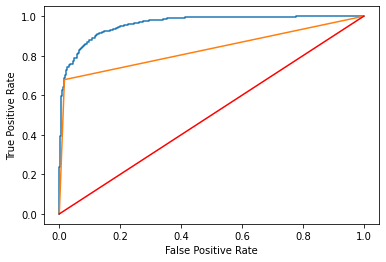

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np

x = np.linspace(0,1,100)
train, test, train_t, test_t = train_test_split(X, y, train_size=0.8)
model = LogisticRegression(n_jobs=-1)
model.fit(train, train_t)

plt.plot(*roc_curve(test_t, model.predict_proba(test)[:,1])[:2])
plt.plot(*roc_curve(test_t, model.predict(test))[:2])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.plot(x, x, '-r')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_t, model.predict_proba(test)[:,1])
print(auc)

0.9648886258313317


## **PR CURVE**

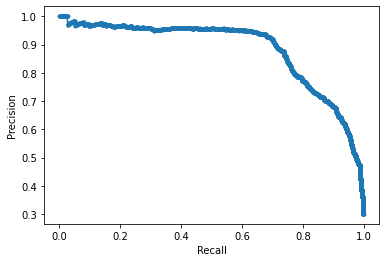

In [ ]:
from sklearn.metrics import precision_recall_curve
lr_precision, lr_recall = precision_recall_curve(test_t, model.predict_proba(test)[:,1])[:2]
plt.plot(lr_recall, lr_precision, marker='.',)

plt.xlabel('Recall')
plt.ylabel('Precision')

plt.show()

## **With SMOTE**

## **Logistic Regression**

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import warnings

warnings.filterwarnings('ignore')

def k(k):
    kf = model_selection.KFold(n_splits=k, shuffle=True)
    model = LogisticRegression(n_jobs=-1)
    #result = cross_val_score(model, os_data_X, os_data_y, cv = kf, n_jobs = -1)
    mean_score = cross_val_score(model, os_data_X, os_data_y, scoring="recall", cv = kf,n_jobs = -1)
    print("Avg Recall: {:.4f}".format(mean_score.mean()))
    #print("Avg accuracy: {:.4f}".format(result.mean()))

lis = [5,7,9,13]
for x in range(len(lis)):
    k(lis[x])

Avg Recall: 0.8569
Avg Recall: 0.8584
Avg Recall: 0.8572
Avg Recall: 0.8578


Accuracy: 0.893
Recall: 0.895
Precision: 0.679


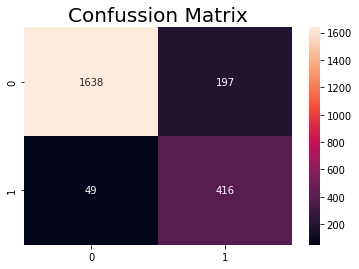

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(n_jobs=-1)
model.fit(os_data_X, os_data_y)
threshold = 0.5
y_pred=model.predict(X_test)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = 'g')
plt.title("Confussion Matrix", fontsize = 20)

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))

## *Feature Importance*

In [ ]:
# model = LogisticRegression()
# model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': os_data_X.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

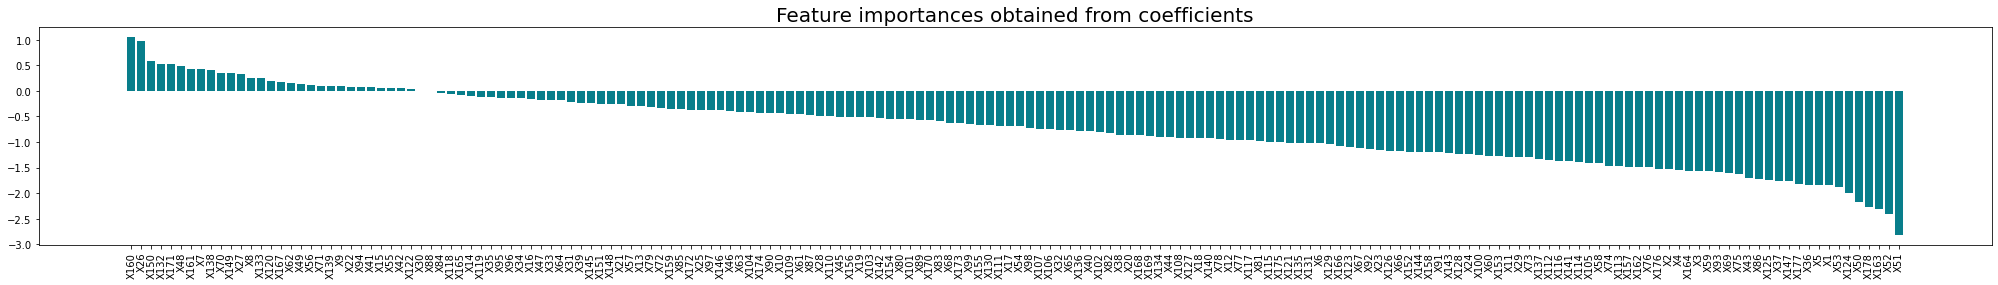

In [ ]:
plt.figure(figsize=(35,4))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

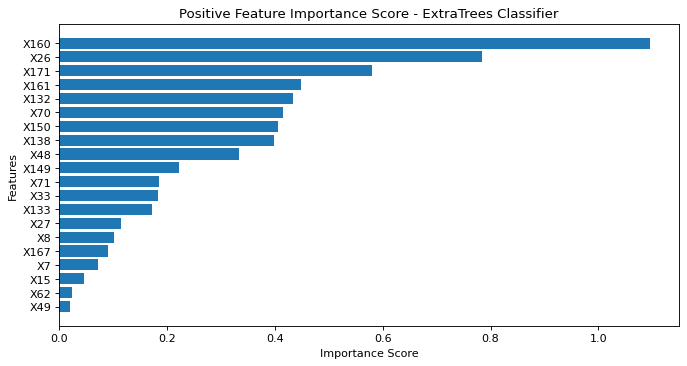

In [ ]:
importances.set_index('Attribute',inplace=True)

pos_features = importances.loc[importances.Importance > 0]

num = np.min([50, len(pos_features)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = pos_features.iloc[:num].values.ravel()[::-1]
feature_labels = list(pos_features.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - ExtraTrees Classifier')
plt.yticks(ylocs, feature_labels)
plt.show()

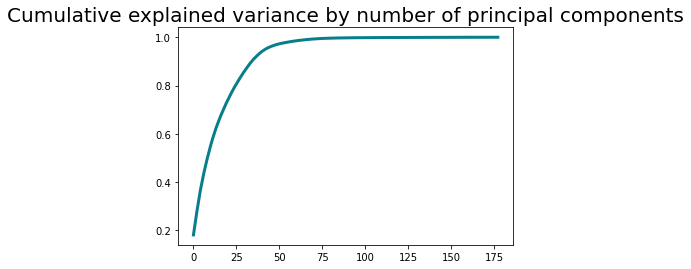

It means we can explain 90-ish% of the variance in your source dataset with the first 35 principal components


In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

print("It means we can explain 90-ish% of the variance in your source dataset with the first 35 principal components")

In [ ]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_),
    columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)],
    index=X_train.columns
)
loadings.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
X1 -0.033829 -0.012931 -0.005369  0.003355  0.002431 -0.001299  0.003983   
X2 -0.033467 -0.012469 -0.007425  0.001338  0.002344 -0.000987  0.006772   
X3 -0.032313 -0.011440 -0.009698 -0.001717  0.002706 -0.001371  0.008832   
X4 -0.031025 -0.010037 -0.012033 -0.004218  0.002933 -0.001862  0.009442   
X5 -0.031845 -0.009095 -0.014044 -0.005336  0.001902 -0.001678  0.009925   

         PC8       PC9      PC10  ...     PC169     PC170     PC171     PC172  \
X1 -0.007410  0.002437  0.004664  ... -0.000021  0.000011 -0.000036  0.000009   
X2 -0.010967  0.005194  0.003350  ...  0.000034 -0.000031  0.000141 -0.000044   
X3 -0.015213  0.007683  0.001945  ...  0.000053  0.000086 -0.000280  0.000114   
X4 -0.020542  0.010000 -0.000495  ... -0.000231 -0.000203  0.000367 -0.000251   
X5 -0.025859  0.012587 -0.003243  ...  0.000361  0.000261 -0.000236  0.000347   

       PC173     PC174     PC175     PC176     PC177     PC178  
X1 -0.000013 -0.000097  0.000046  0.000046 -0.000018  0.000014  
X2 -0.000011  0.000276 -0.000135 -0.000145  0.000110 -0.000131  
X3  0.000193 -0.000378  0.000173  0.000166 -0.000314  0.000286  
X4 -0.000459  0.000418 -0.000161 -0.000105  0.000488 -0.000353  
X5  0.000618 -0.000464  0.000191  0.000018 -0.000443  0.000319  

[5 rows x 178 columns]

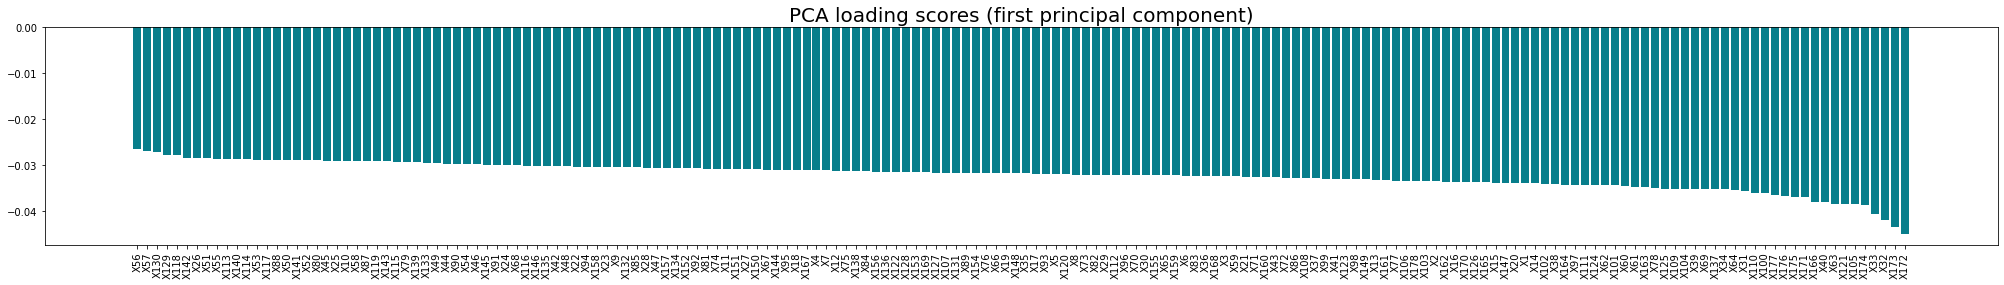

In [ ]:
# https://betterdatascience.com/feature-importance-python/

plt.figure(figsize=(35,4))
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

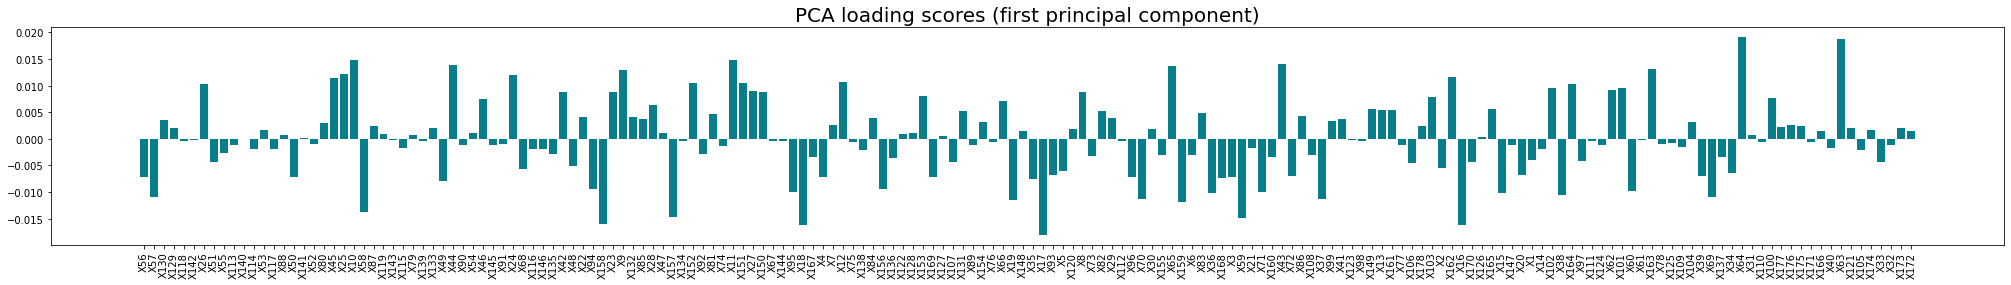

In [ ]:
plt.figure(figsize=(35,4))
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC35']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

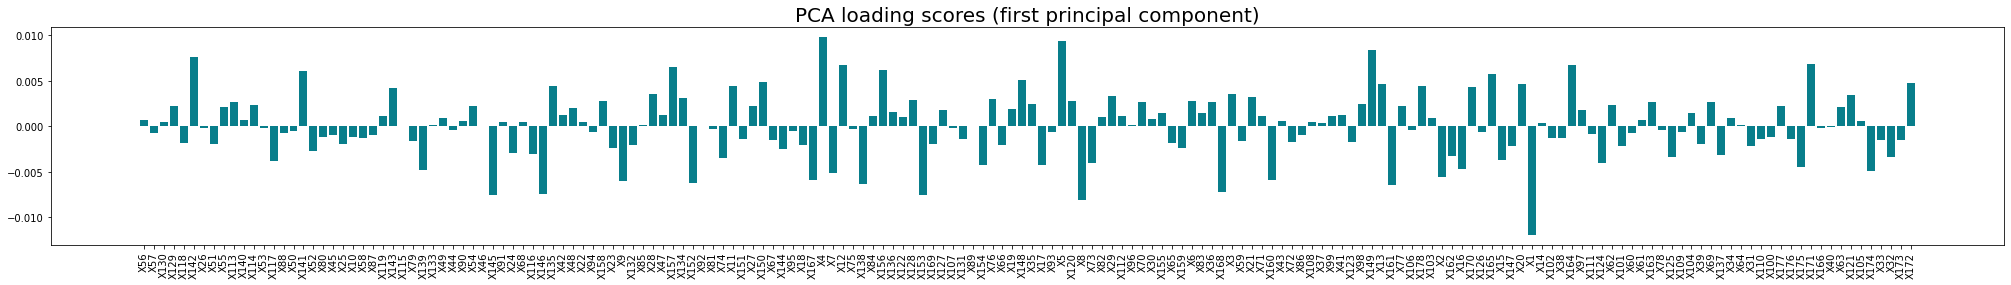

In [ ]:
plt.figure(figsize=(35,4))
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC50']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

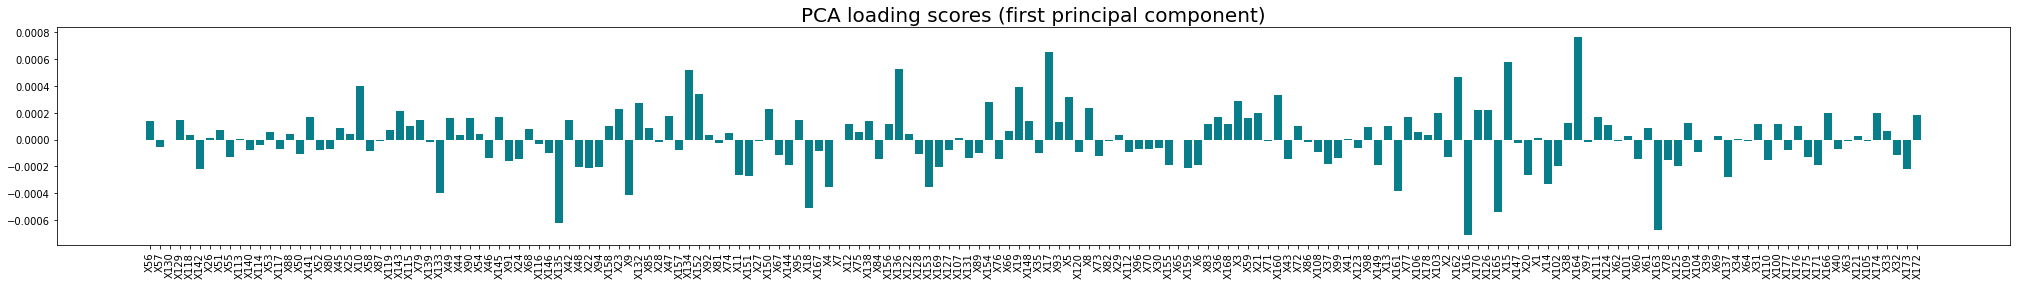

In [ ]:
plt.figure(figsize=(35,4))
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC178']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

## **ROC**

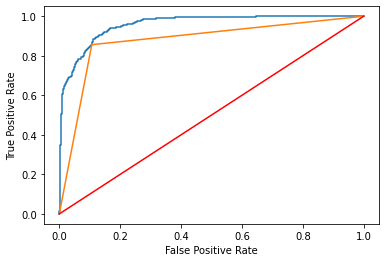

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np

x = np.linspace(0,1,100)
train, test, train_t, test_t = train_test_split(os_data_X, os_data_y, train_size=0.8)
model = LogisticRegression(n_jobs=-1)
model.fit(train, train_t)

plt.plot(*roc_curve(test_t, model.predict_proba(test)[:,1])[:2])
plt.plot(*roc_curve(test_t, model.predict(test))[:2])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.plot(x, x, '-r')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_t, model.predict_proba(test)[:,1])
print(auc)

0.9577184328442532


## **PR CURVE**

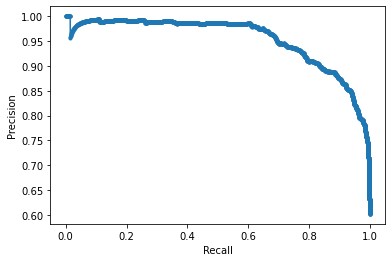

In [ ]:
from sklearn.metrics import precision_recall_curve
lr_precision, lr_recall = precision_recall_curve(test_t, model.predict_proba(test)[:,1])[:2]
plt.plot(lr_recall, lr_precision, marker='.',)

plt.xlabel('Recall')
plt.ylabel('Precision')

plt.show()

### **Naive Bayes**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X , y,test_size=0.2, random_state=42)


In [ ]:
# Model specific Library
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [ ]:
# Gaussian: Gaussian naive bayes is good at handling continuous values[Measurable],
# As our dataset is measure value from electroencephalogram (EEG) so we go for Gaussian Naive Bayes

clf = GaussianNB()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9578260869565217

In [ ]:
## Multinominal: Multinomial Naive bayes is good at handling discrete values[countable]
clf_mn = MultinomialNB()
clf_mn.fit(X_train, y_train)
clf_mn.score(X_test, y_test)

0.7978260869565217

In [ ]:
# Berouilli: Bernoulli Naive bayes is good at handling boolean/binary attributes
clf_b = BernoulliNB()
clf_b.fit(X_train, y_train)
clf_b.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8039130434782609

## *with SMOTE*

### *Gaussian*

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(os_data_X , os_data_y,test_size=0.2, random_state=42)

clf = GaussianNB()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9086897488119484

In [ ]:
## multinominal
clf_mn = MultinomialNB()
clf_mn.fit(X_train, y_train)
clf_mn.score(X_test, y_test)

0.47522063815342835

In [ ]:
# Berouilli
clf_b = BernoulliNB()
clf_b.fit(X_train, y_train)
clf_b.score(X_test, y_test)

0.5135777325186693

### **Additional experiment: Multiple Model**

In [ ]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


X_train, X_test, y_train, y_test= train_test_split(os_data_X , os_data_y,test_size=0.2, random_state=42)
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold= model_selection.KFold(n_splits=10)
    cv_results= model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.879161 (0.012639)
LDA: 0.848439 (0.011459)
KNN: 0.980566 (0.005362)
CART: 0.910643 (0.008467)
NB: 0.905381 (0.008138)
SVM: 0.942126 (0.008703)


### **KNN**